In [24]:
from blocks.serialization import load
from theano import tensor, function

# theano variables
features_car_cat = tensor.dmatrix('features_car_cat')
features_car_int = tensor.dmatrix('features_car_int')
features_nocar_cat = tensor.dmatrix('features_nocar_cat')
features_nocar_int = tensor.dmatrix('features_nocar_int')
features_cp = tensor.imatrix('codepostal')
features_hascar = tensor.imatrix('features_hascar')

main_loop = load(open("./model", "rb"))
model = main_loop.model

In [25]:
f = model.get_theano_function()

In [26]:
from fuel.datasets.hdf5 import H5PYDataset

submit_set = H5PYDataset(
    './data/data.hdf5',
    which_sets=('submit',),
    load_in_memory=True
)

from fuel.schemes import ShuffledScheme
from fuel.streams import DataStream


submit_stream = DataStream.default_stream(
    submit_set,
    iteration_scheme=ShuffledScheme(submit_set.num_examples, batch_size=5000)
)

(u'codepostal', u'features_car_cat', u'features_car_int', u'features_hascar', u'features_nocar_cat', u'features_nocar_int', u'labels')


In [29]:
i = 300001
output_file = open('submit.csv', 'w')
output_file.write('ID;COTIS\n')
for d in submit_stream.get_epoch_iterator():
    output = f(d[0], d[1], d[2], d[3], d[4], d[5], d[6])
    
    for estim in output[1][:,0]:
        output_file.write('%d;%.3f\n' % (i, estim))
        i += 1
    
output_file.close()

In [32]:
print model.inputs
print submit_set.provides_sources


[<TensorType(float64, vector)>, b, b, b, b, W, W, W, W]
(u'codepostal', u'features_car_cat', u'features_car_int', u'features_hascar', u'features_nocar_cat', u'features_nocar_int', u'labels')


In [37]:
for sv in model.shared_variables:
    print sv.name
    print sv.get_value().shape


None
(23712,)
b
(1,)
b
(800,)
b
(1,)
b
(800,)
W
(193, 800)
W
(140, 800)
W
(800, 1)
W
(800, 1)


In [38]:
print model.shared_variables[0].get_value()

[ 346.04348755  434.70510864  371.25332642 ...,  346.04348755  346.04348755
  346.04348755]


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

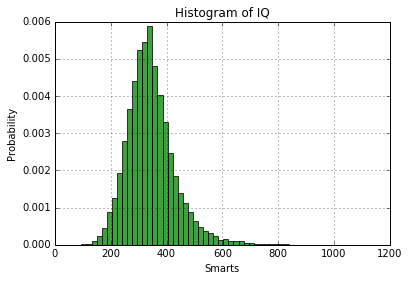

In [43]:
n, bins, patches = plt.hist(model.shared_variables[0].get_value(), 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()